# Convolution neural network

## 1. Convolutional layer

![](../../images/convolution8.png)

Mối hidden layer được gọi là `Fully connected layer` nếu mỗi node trong hidden layer được kết nối với tất cả các node trong layer trước. Cả mô hình được gọi là `Fully connected neural network(FCN)`


## 2. Vấn đề của fully connected neural network với xử lý ảnh

Đối với các FCN, việc xử lý cho những ảnh có số chiều lớn, ví dụ ảnh màu 64x64 được biểu diễn dưới dạng 1 tensor 64x64x3. Nên để biểu thị hết nội dung của bức ảnh thì cần truyền vào input layer tất cả các pixel (64*64*3 = 12288). Nghĩa là input layer giờ có 12288 nodes.

![](../../images/convolution9.png)

Giả sử số lượng node trong hidden layer 1 là 1000. Số lượng weight W giữa input layer và hidden layer 1 là 12288x1000 = 12288000, số lượng bias là 1000 => tổng số parameter là: 12289000. Đấy mới chỉ là số parameter giữa input layer và hidden layer 1, trong model còn nhiều layer nữa, và nếu kích thước ảnh tăng, ví dụ 512*512 thì số lượng parameter tăng cực kì nhanh => Cần giải pháp tốt hơn !!!

Nhận xét:

- Trong ảnh các pixel ở cạnh nhau thường có liên kết với nhau hơn là những pixel ở xa. Ví dụ như phép tính convolution trên ảnh ở bài trước. Để tìm các đường trong ảnh, ta áp dụng sobel kernel trên mỗi vùng kích thước 3*3. Hay làm nét ảnh ta áp dụng sharpen kernel cũng trên vùng có kích thước 3*3.
- Trong phép tính convolution trong ảnh, chỉ 1 kernel được dùng trên toàn bộ bức ảnh. Hay nói cách khác là các pixel ảnh chia sẻ hệ số với nhau.
=> Áp dụng phép tính convolution vào layer trong neural network ta có thể giải quyết được vấn đề lượng lớn parameter mà vẫn lấy ra được các đặc trưng của ảnh.

## 3. Convolution layer cho ảnh màu

Đối với ảnh màu có 3 channels red, green, blue nên ta sẽ định nghĩa kernel có kích thước là kxkx3

![](../../images/convolution10.png)

Ta định nghĩa kernel có cùng độ sâu (depth) với biểu diễn ảnh, rồi sau đó thực hiện di chuyển khối kernel tương tự như khi thực hiện trên ảnh xám.

Khi biểu diễn ma trận ta cần 2 chỉ số hàng và cột: i và j, thì khi biểu diễn ở dạng tensor 3 chiều cần thêm chỉ số độ sâu k. Nên chỉ số mỗi phần tử trong tensor là x<sub>ijk</sub>

![](../../images/convolution12.png)

![](../../images/giphy2.webp)

Nhận xét:

- Output Y của phép tính convolution trên ảnh màu là 1 matrix.
- Có 1 hệ số bias được cộng vào sau bước tính tổng các phần tử của phép tính element-wise

![](../../images/convolution13.png)


### Convolutional layer tổng quát:

Giả sử input của 1 convolutional layer tổng quát là tensor kích thước H * W * D.

Kernel có kích thước F * F * D (kernel luôn có depth bằng depth của input và F là số lẻ), stride: S, padding: P.

Convolutional layer áp dụng K kernel.

![](../../images/convolution14.png)

Lưu ý:

- Output của convolutional layer sẽ qua hàm activation function trước khi trở thành input của convolutional layer tiếp theo.
- Tổng số parameter của layer: Mỗi kernel có kích thước F*F*D và có 1 hệ số bias, nên tổng parameter của 1 kernel là F*F*D + 1. Mà convolutional layer áp dụng K kernel => Tổng số parameter trong layer này là K * (F*F*D + 1).

## 4. Pooling layer

Pooling layer thường được dùng giữa các convolutional layer, để giảm kích thước dữ liệu nhưng vẫn giữ được các thuộc tính quan trọng. Kích thước dữ liệu giảm giúp giảm việc tính toán trong model.

Gọi pooling size kích thước K * K. Input của pooling layer có kích thước H * W * D, ta tách ra làm D ma trận kích thước H * W. Với mỗi ma trận, trên vùng kích thước K * K trên ma trận ta tìm maximum hoặc average của dữ liệu rồi viết vào ma trận kết quả. Quy tắc về stride và padding áp dụng như phép tính convolution trên ảnh.

![](../../images/giphy3.webp)

Nhưng hầu hết khi dùng pooling layer thì sẽ dùng size=(2,2), stride=2, padding=0. Khi đó output width và height của dữ liệu giảm đi một nửa, depth thì được giữ nguyên .

![](../../images/convolution15.png)

Có 2 loại pooling layer phổ biến là: max pooling và average pooling.

![](../../images/convolution16.png)


**Trong một số model người ta dùng convolutional layer với stride > 1 để giảm kích thước dữ liệu thay cho pooling layer.**

## 5. Fully connected layer

Sau khi ảnh được truyền qua nhiều convolutional layer và pooling layer thì model đã học được tương đối các đặc điểm của ảnh (ví dụ mắt, mũi, khung mặt,…) thì tensor của output của layer cuối cùng, kích thước H * W * D, sẽ được chuyển về 1 vector kích thước (H * W * D)

![](../../images/convolution17.png)

## 6. Visualise convolutional neural network

![](../../images/convolution18.png)

## 7. Mạng VGG16

VGG16 là mạng convolutional neural network được đề xuất bởi K. Simonyan and A. Zisserman, University of Oxford. Model sau khi train bởi mạng VGG16 đạt độ chính xác 92.7% top-5 test trong dữ liệu ImageNet gồm 14 triệu hình ảnh thuộc 1000 lớp khác nhau. Giờ áp dụng kiến thức ở trên để phân tích mạng VGG 16.

![](../../images/convolution19.png)

Phân tích:

- Convolutional layer: kích thước 3*3, padding=1, stride=1. Tại sao không ghi stride, padding mà vẫn biết? Vì mặc định sẽ là stride=1 và padding để cho output cùng width và height với input.
- Pool/2 : max pooling layer với size 2*2
- 3*3 conv, 64: thì 64 là số kernel áp dụng trong layer đấy, hay depth của output của layer đấy.
- Càng các convolutional layer sau thì kích thước width, height càng giảm nhưng depth càng tăng.
- Sau khá nhiều convolutional layer và pooling layer thì dữ liệu được flatten và cho vào fully connected layer.

## Pytorch example

![](../../images/convolution20.png)

Files already downloaded and verified
Files already downloaded and verified
Train datasets: (50000, 32, 32, 3)
torch.Size([4, 3, 32, 32]) torch.Size([4])
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


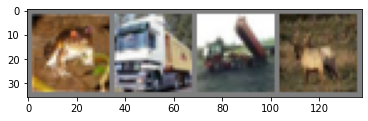

In [41]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
import numpy as np
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset and transforms
# mean for each channels
mean = (0.5, 0.5, 0.5)
# standard deviation
std = (0.5, 0.5, 0.5)
# For pytorch, Normalize is Standardlization
composedTransform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(mean, std)])

train_dataset = datasets.CIFAR10(root="../../data",
                                             train=True,
                                             download=True,
                                             transform=composedTransform)

test_dataset = datasets.CIFAR10(root="../../data",
                                             train=False,
                                             download=True,
                                             transform=composedTransform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          shuffle=False)

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                          shuffle=False)

examples = iter(train_loader)
print(f"Train datasets: {train_dataset.data.shape}")

samples, labels = examples.next()
print(samples.shape, labels.shape)
# classes = tuple(train_dataset.classes)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(f"{classes}")
def imshow(img):
    img = img/2 + 0.5 #
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

imshow(torchvision.utils.make_grid(samples))



In [42]:
# Implement convolution neural network

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # after conv1, from 3x32x32 to 6x28x28
        # after pool1, from 6x28x28 to 6x14x14
        # after conv2, from 6x14x14 to 16x10x10
        # after pool2, from 16x10x10 to 16x5x5
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        
    

model = ConvNet().to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_totals_step = len(train_loader)

for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader):
        # original shape : [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        # update parameters
        optimizer.step()
        
        if ( idx + 1) % 2000 == 0:
            print(f"epoch {epoch + 1} / {num_epochs}, step {idx+1}/{n_totals_step}, loss={loss.item():.4f}")
            
print("Finished Training")

# Test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        ouputs = model(images)
        
        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples +=labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if( label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] +=1
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network = {acc}%')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]} = {acc}%')
        

epoch 1 / 5, step 2000/12500, loss=2.2452
epoch 1 / 5, step 4000/12500, loss=2.1918
epoch 1 / 5, step 6000/12500, loss=1.4322
epoch 1 / 5, step 8000/12500, loss=1.3892
epoch 1 / 5, step 10000/12500, loss=2.0493
epoch 1 / 5, step 12000/12500, loss=1.4388
epoch 2 / 5, step 2000/12500, loss=2.1731
epoch 2 / 5, step 4000/12500, loss=2.8419
epoch 2 / 5, step 6000/12500, loss=2.0856
epoch 2 / 5, step 8000/12500, loss=1.4173
epoch 2 / 5, step 10000/12500, loss=1.8440
epoch 2 / 5, step 12000/12500, loss=1.0624
epoch 3 / 5, step 2000/12500, loss=1.5801
epoch 3 / 5, step 4000/12500, loss=1.9858
epoch 3 / 5, step 6000/12500, loss=1.2397
epoch 3 / 5, step 8000/12500, loss=1.3772
epoch 3 / 5, step 10000/12500, loss=1.7734
epoch 3 / 5, step 12000/12500, loss=1.3781
epoch 4 / 5, step 2000/12500, loss=0.8565
epoch 4 / 5, step 4000/12500, loss=1.8200
epoch 4 / 5, step 6000/12500, loss=1.8457
epoch 4 / 5, step 8000/12500, loss=1.6402
epoch 4 / 5, step 10000/12500, loss=1.3820
epoch 4 / 5, step 12000/125